# Phase 1


In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import missingno as msno
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\ss\OneDrive\Desktop\Msc Project\Datasets\Warehouse_and_Retail_Sales.csv")

In [3]:
data

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00
...,...,...,...,...,...,...,...,...,...
307640,2020,9,DOPS INC,97896,ST PETERS ORGANIC ENG ALE NR 12/CS - 16.9OZ,BEER,0.00,0.0,1.00
307641,2020,9,ANHEUSER BUSCH INC,97918,STELLA ARTOIS 2/12 NR - 11.2OZ,BEER,372.45,315.0,3586.88
307642,2020,9,HEINEKEN USA,97942,TECATE 4/6 LNNR - 12OZ,BEER,7.79,0.0,4.00
307643,2020,9,RELIABLE CHURCHILL LLLP,97950,S SMITH WINTER WELCOME NR 12/CS - 18.7OZ,BEER,0.00,0.0,2.00


In [4]:
# Combine YEAR and MONTH into a datetime column
data['DATE'] = pd.to_datetime(data['YEAR'].astype(str) + '-' + data['MONTH'].astype(str))

# Set DATE as index
# data.set_index('DATE', inplace=True)

# Sort by date just to keep things clean
data.sort_values('DATE', inplace=True)


In [5]:
data

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE
43379,2017,6,MONSIEUR TOUTON SELECTION,359696,TRE FILI P/GRIGIO ORGANIC - 750ML,WINE,0.00,0.0,1.0,2017-06-01
44816,2017,6,BARON FRANCOIS LTD,438790,RAISSAC LES LYS RSE DE CAB - 750ML,WINE,19.34,15.0,11.0,2017-06-01
44817,2017,6,A VINTNERS SELECTIONS,438804,LA CANA ALBARINO - 750ML,WINE,0.16,0.0,1.0,2017-06-01
44818,2017,6,USA WINE IMPORTS,438847,BOUKE RED - 750ML,WINE,0.08,0.0,0.0,2017-06-01
44819,2017,6,QUINTESSENTIAL LLC,438863,GUSTAVE LORENTZ RES RIES - 750ML,WINE,0.24,0.0,0.0,2017-06-01
...,...,...,...,...,...,...,...,...,...,...
299928,2020,9,BACCHUS IMPORTERS LTD,32174,CITADELLE GIN - 750ML,LIQUOR,3.89,5.0,0.0,2020-09-01
299929,2020,9,"THE COUNTRY VINTNER, LLC DBA WINEBOW",321742,GROS NORE BANDOL RGE - 750ML,WINE,0.00,0.0,1.0,2020-09-01
299930,2020,9,E & J GALLO WINERY,321806,LIBERTY CREEK PINK MOSCATO - 1.5L,WINE,1.19,0.0,14.0,2020-09-01
299932,2020,9,LAIRD AND COMPANY,70478,LAZZARONI SAMBUCA - 750ML,LIQUOR,0.68,0.0,0.0,2020-09-01


In [6]:
new_order = ['DATE','YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

# Reorder columns
data = data[new_order]

In [7]:
data.columns

Index(['DATE', 'YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

In [8]:
print("🧾 Basic Info")
print(data.info())
print("\n🔍 Descriptive Stats")
print(data.describe())

print("\n📦 Unique counts")
print("Unique items:", data['ITEM CODE'].nunique())
print("Unique suppliers:", data['SUPPLIER'].nunique())
print("Unique item types:", data['ITEM TYPE'].nunique())


🧾 Basic Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 307645 entries, 43379 to 307644
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              307645 non-null  datetime64[ns]
 1   YEAR              307645 non-null  int64         
 2   MONTH             307645 non-null  int64         
 3   SUPPLIER          307478 non-null  object        
 4   ITEM CODE         307645 non-null  object        
 5   ITEM DESCRIPTION  307645 non-null  object        
 6   ITEM TYPE         307644 non-null  object        
 7   RETAIL SALES      307642 non-null  float64       
 8   RETAIL TRANSFERS  307645 non-null  float64       
 9   WAREHOUSE SALES   307645 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 25.8+ MB
None

🔍 Descriptive Stats
                YEAR          MONTH   RETAIL SALES  RETAIL TRANSFERS  \
count  307645.000000  307645.000

In [9]:
# Null value summary
print("\n🔧 Null Value Summary:")
print(data.isnull().sum())




🔧 Null Value Summary:
DATE                  0
YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64


In [10]:
# Replacing Nan Values
data['SUPPLIER'] = data['SUPPLIER'].fillna('UNKNOWN')
data = data.dropna(subset=['ITEM TYPE'])

In [11]:
# Add TOTAL SALES field
data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

# Check for negative sales
negative_sales = data[data['TOTAL SALES'] < 0]
negative_sales

#  Remove negative sales for modeling (if focusing on gross sales)
data = data[data['TOTAL SALES'] >= 0]


In [12]:
data

,DATE,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
43379,2017-06-01,2017,6,MONSIEUR TOUTON SELECTION,359696,TRE FILI P/GRIGIO ORGANIC - 750ML,WINE,0.00,0.0,1.0,1.00
44816,2017-06-01,2017,6,BARON FRANCOIS LTD,438790,RAISSAC LES LYS RSE DE CAB - 750ML,WINE,19.34,15.0,11.0,30.34
44817,2017-06-01,2017,6,A VINTNERS SELECTIONS,438804,LA CANA ALBARINO - 750ML,WINE,0.16,0.0,1.0,1.16
44818,2017-06-01,2017,6,USA WINE IMPORTS,438847,BOUKE RED - 750ML,WINE,0.08,0.0,0.0,0.08
44819,2017-06-01,2017,6,QUINTESSENTIAL LLC,438863,GUSTAVE LORENTZ RES RIES - 750ML,WINE,0.24,0.0,0.0,0.24
...,...,...,...,...,...,...,...,...,...,...,...
299928,2020-09-01,2020,9,BACCHUS IMPORTERS LTD,32174,CITADELLE GIN - 750ML,LIQUOR,3.89,5.0,0.0,3.89
299929,2020-09-01,2020,9,"THE COUNTRY VINTNER, LLC DBA WINEBOW",321742,GROS NORE BANDOL RGE - 750ML,WINE,0.00,0.0,1.0,1.00
299930,2020-09-01,2020,9,E & J GALLO WINERY,321806,LIBERTY CREEK PINK MOSCATO - 1.5L,WINE,1.19,0.0,14.0,15.19
299932,2020-09-01,2020,9,LAIRD AND COMPANY,70478,LAZZARONI SAMBUCA - 750ML,LIQUOR,0.68,0.0,0.0,0.68


In [13]:
# Count number of outliers per month-year
data_unstack = data.groupby(['YEAR', 'MONTH']).size().unstack(fill_value=0)
data_unstack

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2017,0,0,0,0,0,13585,12972,13563,13351,13595,14497,14451
2018,13314,13065,0,0,0,0,0,0,0,0,0,0
2019,12373,12258,12658,12689,12929,12299,12475,12387,12398,13059,12825,0
2020,11962,0,11490,0,0,0,11156,0,11560,0,0,0


<AxesSubplot:>

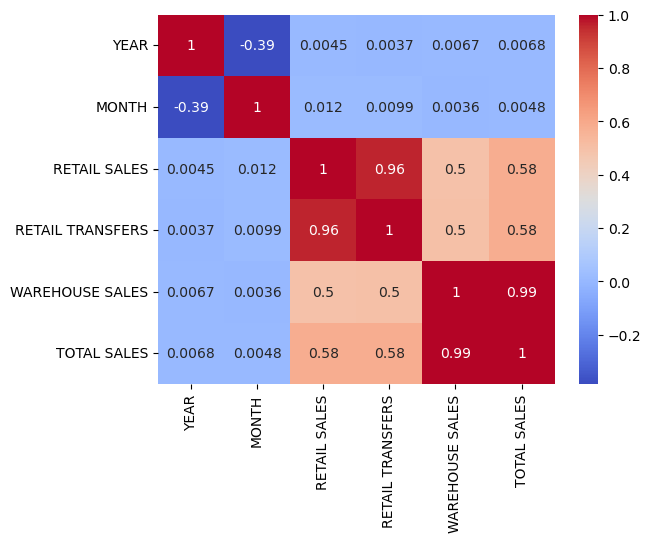

In [14]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


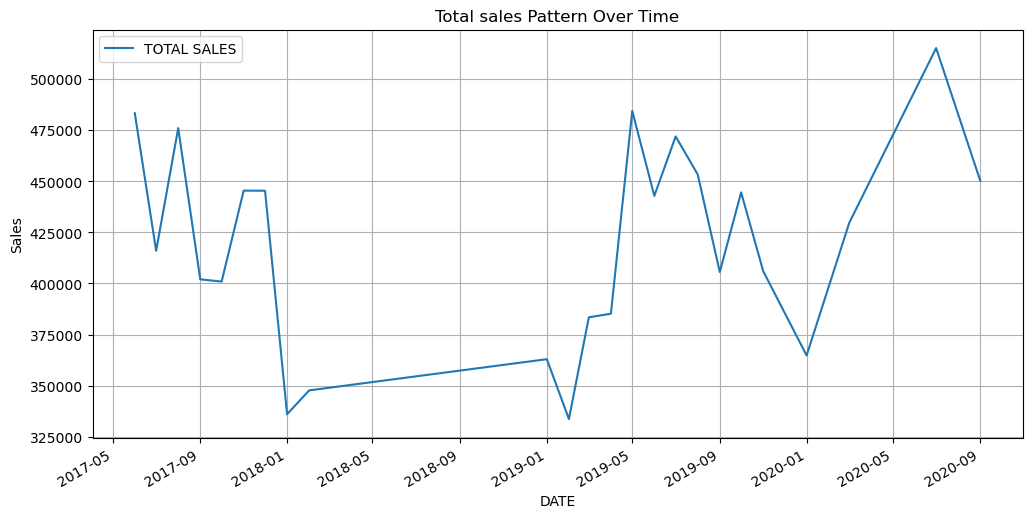

In [15]:
# Plot
data_sales = data.groupby('DATE')[['TOTAL SALES']].sum().reset_index()
data_sales.plot(x='DATE', y=['TOTAL SALES'], figsize=(12,6))
plt.title('Total sales Pattern Over Time')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


<AxesSubplot:xlabel='DATE'>

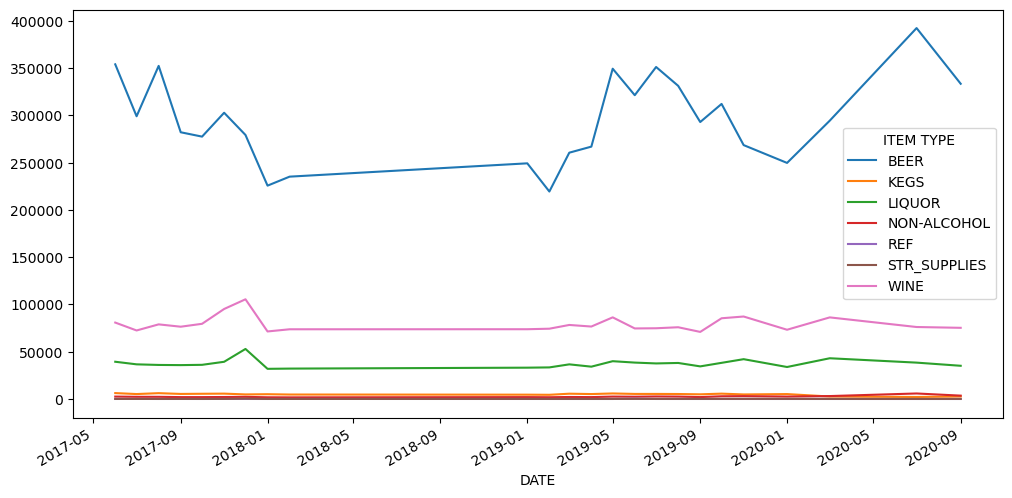

In [16]:
type_trend = data.groupby(['DATE', 'ITEM TYPE'])['TOTAL SALES'].sum().unstack()
type_trend.plot(figsize=(12, 6))


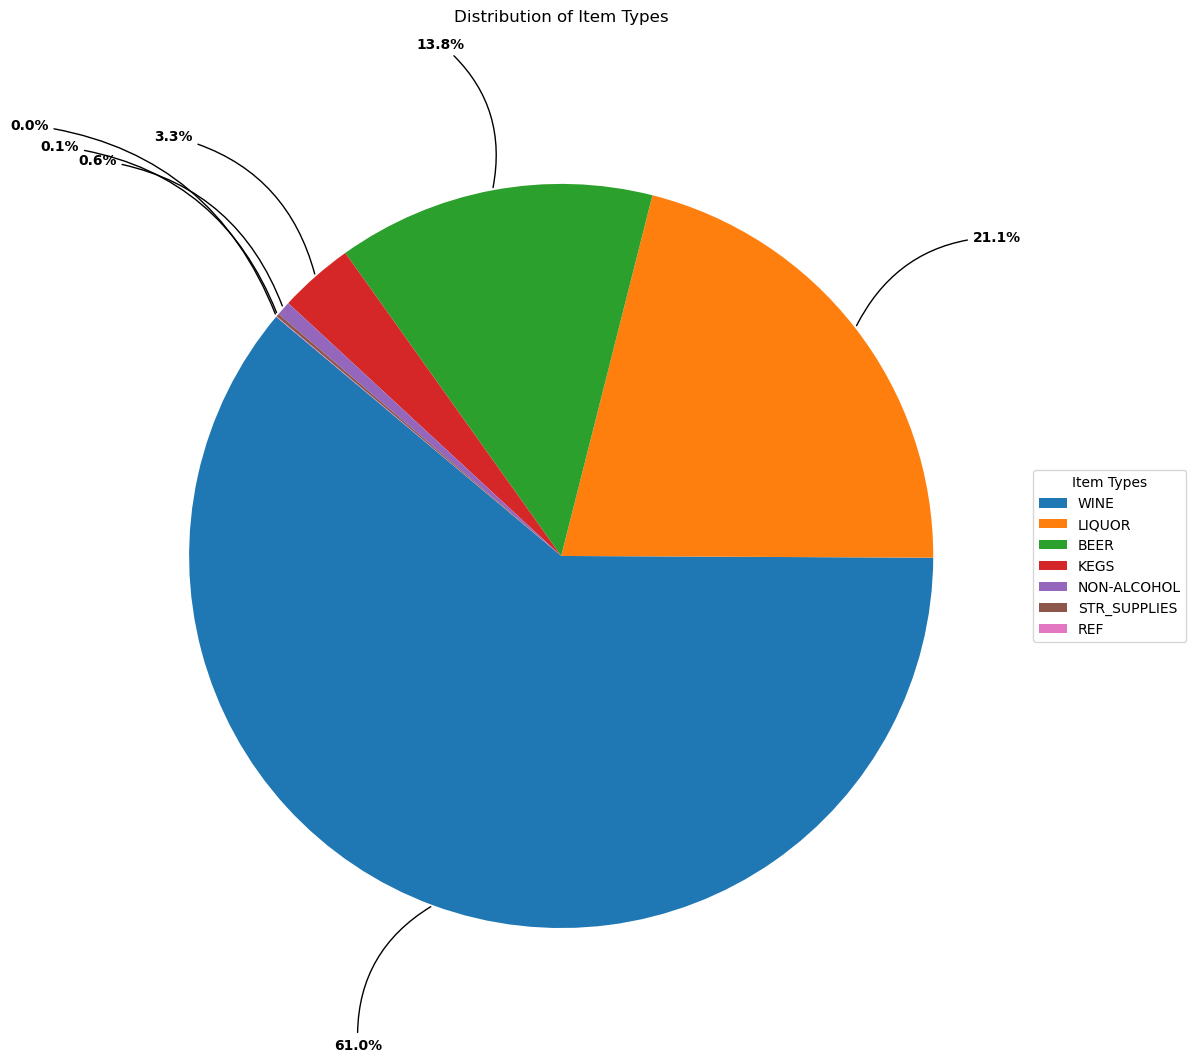

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
item_type_counts = data['ITEM TYPE'].value_counts()
labels = item_type_counts.index
sizes = item_type_counts.values

# Create pie chart
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts = ax.pie(sizes, labels=None, startangle=140)

# Calculate percentages
percentages = 100. * sizes / sizes.sum()

# Adjust annotation line lengths dynamically
for i, (wedge, pct) in enumerate(zip(wedges, percentages)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    
    # Increase text distance based on index or size to reduce crowding
    distance_multiplier = 1.2 + (i * 0.1) if pct < 5 else 1.4  # spread out small slices more
    
    # Bended arrow direction and curvature
    horizontalalignment = 'left' if x >= 0 else 'right'
    connectionstyle = f"arc3,rad={0.3 if x >= 0 else -0.3}"
    
    ax.annotate(f'{pct:.1f}%', xy=(x, y), xytext=(distance_multiplier*x, distance_multiplier*y),
                horizontalalignment=horizontalalignment,
                verticalalignment='center',
                fontsize=10, fontweight='bold',
                arrowprops=dict(arrowstyle='-', connectionstyle=connectionstyle))

# Add legend outside
ax.legend(wedges, labels, title="Item Types",
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Title and layout
ax.set_title("Distribution of Item Types", pad=50)
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='TOTAL SALES'>

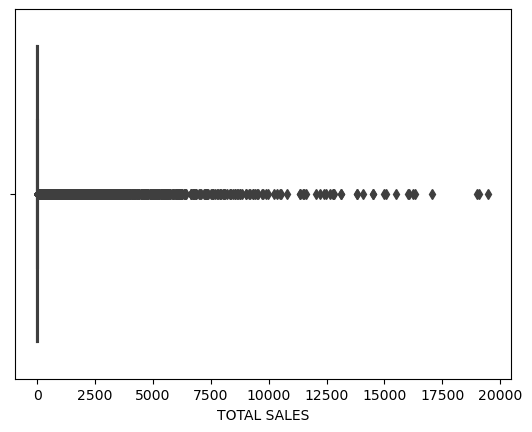

In [18]:
sns.boxplot(x=data['TOTAL SALES'])


In [19]:
# Null value summary
print("\n🔧 Null Value Summary:")
print(data.isnull().sum())




🔧 Null Value Summary:
DATE                0
YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
TOTAL SALES         0
dtype: int64


In [20]:
data.duplicated().sum()

0

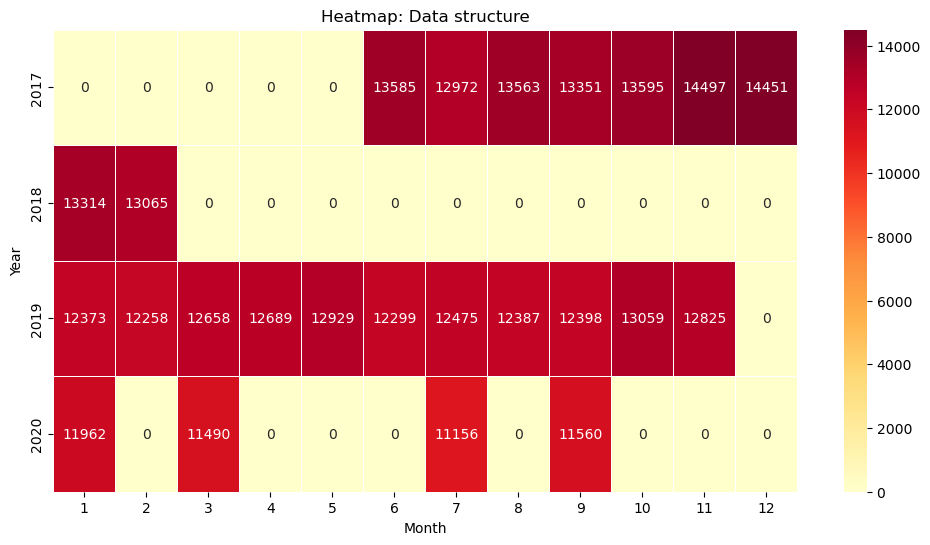

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(data_unstack, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5)
plt.title('Heatmap: Data structure')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()



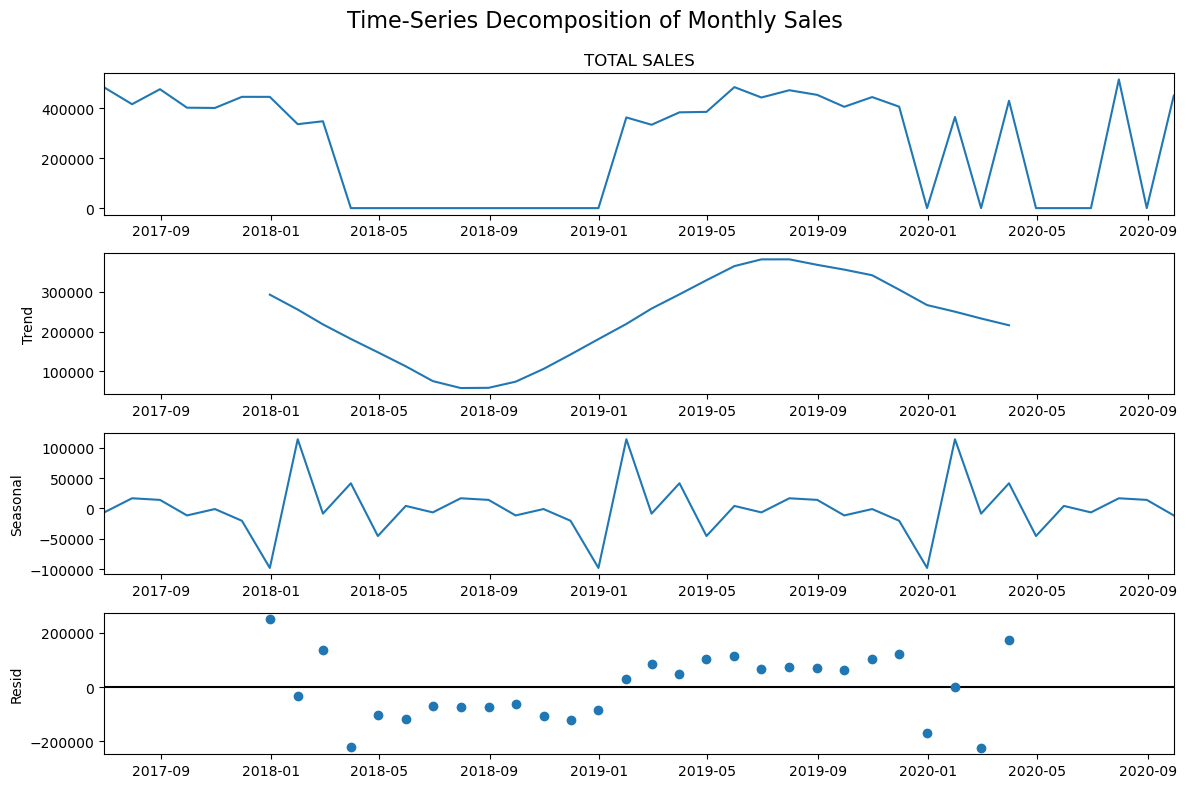

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregating monthly sales
monthly_sales = data.groupby(pd.Grouper(key='DATE', freq='M'))['TOTAL SALES'].sum()

# Decompose time series
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plot decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.suptitle('Time-Series Decomposition of Monthly Sales', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust for the title
plt.show()

# Outlier Detection-> as Promo data


In [23]:
# Calculate IQR for TOTAL SALES
Q1 = data['TOTAL SALES'].quantile(0.25)
Q3 = data['TOTAL SALES'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
Promo_data = data[(data['TOTAL SALES'] < lower_bound) | (data['TOTAL SALES'] > upper_bound)]
Promo_data




,DATE,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
44816,2017-06-01,2017,6,BARON FRANCOIS LTD,438790,RAISSAC LES LYS RSE DE CAB - 750ML,WINE,19.34,15.0,11.0,30.34
44822,2017-06-01,2017,6,E & J GALLO WINERY,439010,LIBERTY CREEK SWEET RED - 1.5L,WINE,9.56,7.0,25.0,34.56
44836,2017-06-01,2017,6,CONSTELLATION BRANDS,439355,BLUFELD MEDIUM SWEET RIESLING - 750ML,WINE,16.73,10.0,15.0,31.73
44887,2017-06-01,2017,6,DIONYSOS IMPORTS INC,4421,SUPERBOCK BEER 4/6NR - 11.2OZ,BEER,0.00,0.0,30.0,30.00
44859,2017-06-01,2017,6,CONSTELLATION BRANDS,44039,SVEDKA VODKA - 1L,LIQUOR,25.71,36.0,6.0,31.71
...,...,...,...,...,...,...,...,...,...,...,...
299910,2020-09-01,2020,9,PERNOD RICARD USA LLC,32140,BEEFEATER GIN - 1.75L,LIQUOR,68.02,62.0,0.0,68.02
299945,2020-09-01,2020,9,JACKSON FAMILY ENTERPRISES INC,307622,MURPHY GOODE P/NOIR - 750ML,WINE,16.80,19.0,23.0,39.80
299948,2020-09-01,2020,9,YUENGLING BREWERY,3077,YUENGLING BLACK & TAN 2/12 NR - 12OZ,BEER,27.00,19.0,167.0,194.00
299952,2020-09-01,2020,9,DUCKHORN WINE COMPANY,321828,DECOY CHARD - 750ML,WINE,15.26,16.0,14.0,29.26


In [24]:
Promo_data

,DATE,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
44816,2017-06-01,2017,6,BARON FRANCOIS LTD,438790,RAISSAC LES LYS RSE DE CAB - 750ML,WINE,19.34,15.0,11.0,30.34
44822,2017-06-01,2017,6,E & J GALLO WINERY,439010,LIBERTY CREEK SWEET RED - 1.5L,WINE,9.56,7.0,25.0,34.56
44836,2017-06-01,2017,6,CONSTELLATION BRANDS,439355,BLUFELD MEDIUM SWEET RIESLING - 750ML,WINE,16.73,10.0,15.0,31.73
44887,2017-06-01,2017,6,DIONYSOS IMPORTS INC,4421,SUPERBOCK BEER 4/6NR - 11.2OZ,BEER,0.00,0.0,30.0,30.00
44859,2017-06-01,2017,6,CONSTELLATION BRANDS,44039,SVEDKA VODKA - 1L,LIQUOR,25.71,36.0,6.0,31.71
...,...,...,...,...,...,...,...,...,...,...,...
299910,2020-09-01,2020,9,PERNOD RICARD USA LLC,32140,BEEFEATER GIN - 1.75L,LIQUOR,68.02,62.0,0.0,68.02
299945,2020-09-01,2020,9,JACKSON FAMILY ENTERPRISES INC,307622,MURPHY GOODE P/NOIR - 750ML,WINE,16.80,19.0,23.0,39.80
299948,2020-09-01,2020,9,YUENGLING BREWERY,3077,YUENGLING BLACK & TAN 2/12 NR - 12OZ,BEER,27.00,19.0,167.0,194.00
299952,2020-09-01,2020,9,DUCKHORN WINE COMPANY,321828,DECOY CHARD - 750ML,WINE,15.26,16.0,14.0,29.26


In [25]:
Promo_data.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
count,44791.000000,44791.000000,44791.000000,44791.000000,44791.000000,44791.000000
mean,2018.504141,6.451765,38.171632,37.653049,162.499740,200.671373
std,1.085834,3.414191,73.375299,71.017859,629.575379,666.264541
min,2017.000000,1.000000,0.000000,-23.000000,-1.000000,24.880000
25%,2017.000000,3.000000,5.250000,5.000000,14.000000,36.880000
50%,2019.000000,7.000000,21.300000,21.000000,34.000000,59.940000
75%,2019.000000,9.000000,42.300000,42.000000,91.000000,132.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000,19491.000000


In [26]:
Promo_data['DATE'].unique()

array(['2017-06-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2017-09-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [27]:
# Profile outliers by supplier and product
outliers_by_supplier = Promo_data['SUPPLIER'].value_counts().head(10)
outliers_by_product = Promo_data['ITEM DESCRIPTION'].value_counts().head(10)
outliers_by_Item = Promo_data['ITEM TYPE'].value_counts().head(10)

outliers_by_month = Promo_data['MONTH'].value_counts().sort_index()

print("Top suppliers with outliers:\n", outliers_by_supplier)
print("\nTop products with outliers:\n", outliers_by_product)
print("\nMonths with most outliers:\n", outliers_by_month)
print("\nItem with most outliers:\n", outliers_by_Item)

Top suppliers with outliers:
 ANHEUSER BUSCH INC          4314
E & J GALLO WINERY          4204
MILLER BREWING COMPANY      2744
CONSTELLATION BRANDS        2369
DIAGEO NORTH AMERICA INC    2105
THE WINE GROUP              1448
CROWN IMPORTS               1182
BOSTON BEER CORPORATION     1147
JIM BEAM BRANDS CO          1082
HEINEKEN USA                1066
Name: SUPPLIER, dtype: int64

Top products with outliers:
 MODELO ESPECIAL-2/12 CAN - 12OZ       24
LINDEMANS BIN 50 SHZ - 1.5L           24
BULLEIT BOURBON - 1.75L               24
TITO'S HANDMADE VODKA - 50ML          24
CYT FRONTERA CHARD - 1.5L             24
CYT FRONTERA CHARD - 750ML            24
JOSE CUERVO SILVER TEQUILA - 750ML    24
BUD LIGHT 18PK NR                     24
CYT FRONTERA CAB/MER - 750ML          24
MONKEY SHOULDER BLEND - 750ML         24
Name: ITEM DESCRIPTION, dtype: int64

Months with most outliers:
 1     5120
2     3441
3     3879
4     1825
5     2024
6     3816
7     5667
8     3759
9     5409
10    

In [28]:
# Count number of outliers per month-year
Promo_data_counts = Promo_data.groupby(['YEAR', 'MONTH']).size().unstack(fill_value=0)
Promo_data

,DATE,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
44816,2017-06-01,2017,6,BARON FRANCOIS LTD,438790,RAISSAC LES LYS RSE DE CAB - 750ML,WINE,19.34,15.0,11.0,30.34
44822,2017-06-01,2017,6,E & J GALLO WINERY,439010,LIBERTY CREEK SWEET RED - 1.5L,WINE,9.56,7.0,25.0,34.56
44836,2017-06-01,2017,6,CONSTELLATION BRANDS,439355,BLUFELD MEDIUM SWEET RIESLING - 750ML,WINE,16.73,10.0,15.0,31.73
44887,2017-06-01,2017,6,DIONYSOS IMPORTS INC,4421,SUPERBOCK BEER 4/6NR - 11.2OZ,BEER,0.00,0.0,30.0,30.00
44859,2017-06-01,2017,6,CONSTELLATION BRANDS,44039,SVEDKA VODKA - 1L,LIQUOR,25.71,36.0,6.0,31.71
...,...,...,...,...,...,...,...,...,...,...,...
299910,2020-09-01,2020,9,PERNOD RICARD USA LLC,32140,BEEFEATER GIN - 1.75L,LIQUOR,68.02,62.0,0.0,68.02
299945,2020-09-01,2020,9,JACKSON FAMILY ENTERPRISES INC,307622,MURPHY GOODE P/NOIR - 750ML,WINE,16.80,19.0,23.0,39.80
299948,2020-09-01,2020,9,YUENGLING BREWERY,3077,YUENGLING BLACK & TAN 2/12 NR - 12OZ,BEER,27.00,19.0,167.0,194.00
299952,2020-09-01,2020,9,DUCKHORN WINE COMPANY,321828,DECOY CHARD - 750ML,WINE,15.26,16.0,14.0,29.26


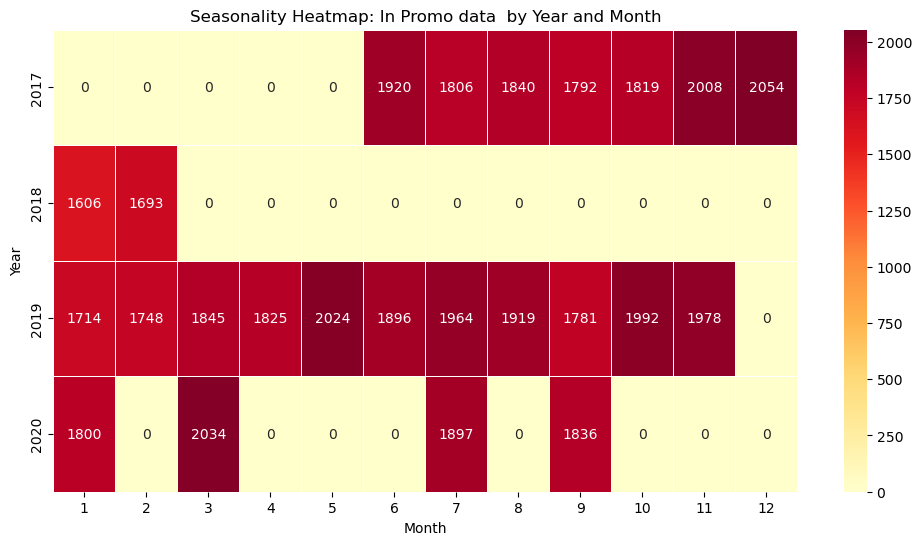

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(Promo_data_counts, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5)
plt.title('Seasonality Heatmap: In Promo data  by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()



# Setting the Remaning data as Normal Sales data

In [30]:
# Optionally, filter out outliers
Normal_sales_data = data[(data['TOTAL SALES'] >= lower_bound) & (data['TOTAL SALES'] <= upper_bound)]
Normal_sales_data

,DATE,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
43379,2017-06-01,2017,6,MONSIEUR TOUTON SELECTION,359696,TRE FILI P/GRIGIO ORGANIC - 750ML,WINE,0.00,0.0,1.0,1.00
44817,2017-06-01,2017,6,A VINTNERS SELECTIONS,438804,LA CANA ALBARINO - 750ML,WINE,0.16,0.0,1.0,1.16
44818,2017-06-01,2017,6,USA WINE IMPORTS,438847,BOUKE RED - 750ML,WINE,0.08,0.0,0.0,0.08
44819,2017-06-01,2017,6,QUINTESSENTIAL LLC,438863,GUSTAVE LORENTZ RES RIES - 750ML,WINE,0.24,0.0,0.0,0.24
44820,2017-06-01,2017,6,REPUBLIC NATIONAL DISTRIBUTING CO,43893,FINEST CALL GRENADINE - 1L,NON-ALCOHOL,0.00,0.0,2.0,2.00
...,...,...,...,...,...,...,...,...,...,...,...
299928,2020-09-01,2020,9,BACCHUS IMPORTERS LTD,32174,CITADELLE GIN - 750ML,LIQUOR,3.89,5.0,0.0,3.89
299929,2020-09-01,2020,9,"THE COUNTRY VINTNER, LLC DBA WINEBOW",321742,GROS NORE BANDOL RGE - 750ML,WINE,0.00,0.0,1.0,1.00
299930,2020-09-01,2020,9,E & J GALLO WINERY,321806,LIBERTY CREEK PINK MOSCATO - 1.5L,WINE,1.19,0.0,14.0,15.19
299932,2020-09-01,2020,9,LAIRD AND COMPANY,70478,LAZZARONI SAMBUCA - 750ML,LIQUOR,0.68,0.0,0.0,0.68


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


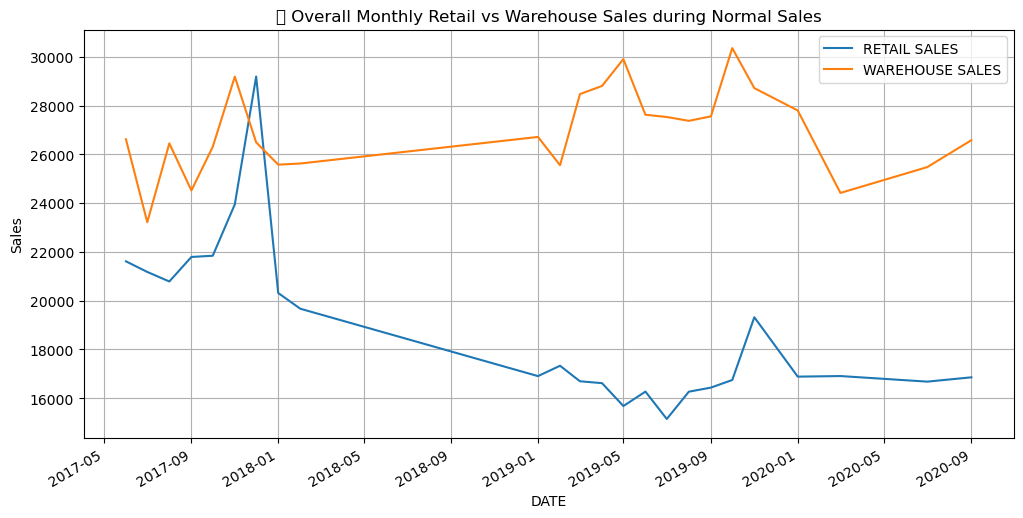

In [31]:
# Total monthly sales: Retail + Warehouse
monthly_sales = Normal_sales_data.groupby('DATE')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Plot
monthly_sales.plot(x='DATE', y=['RETAIL SALES', 'WAREHOUSE SALES'], figsize=(12,6))
plt.title('📊 Overall Monthly Retail vs Warehouse Sales during Normal Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


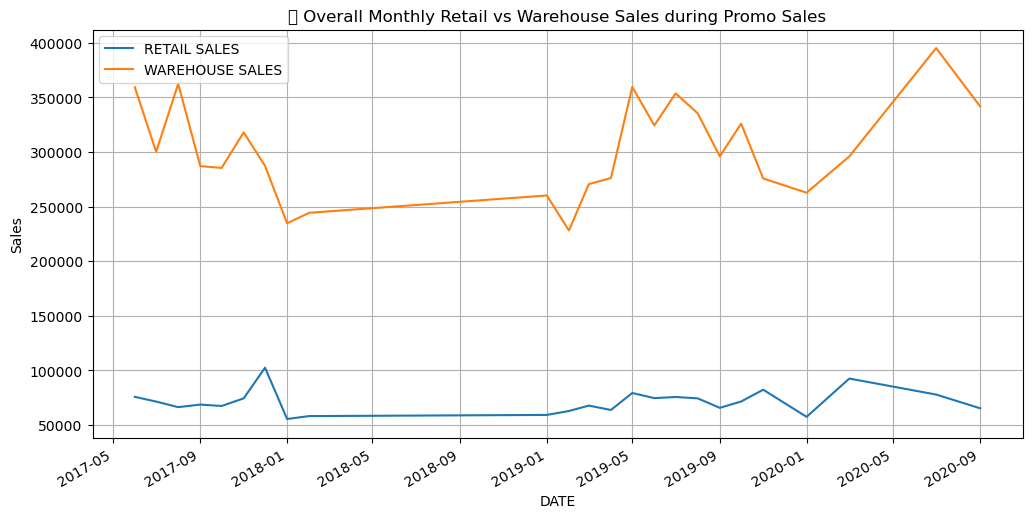

In [32]:
# Total monthly sales: Retail + Warehouse
monthly_sales = Promo_data.groupby('DATE')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()

# Plot
monthly_sales.plot(x='DATE', y=['RETAIL SALES', 'WAREHOUSE SALES'], figsize=(12,6))
plt.title('📊 Overall Monthly Retail vs Warehouse Sales during Promo Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


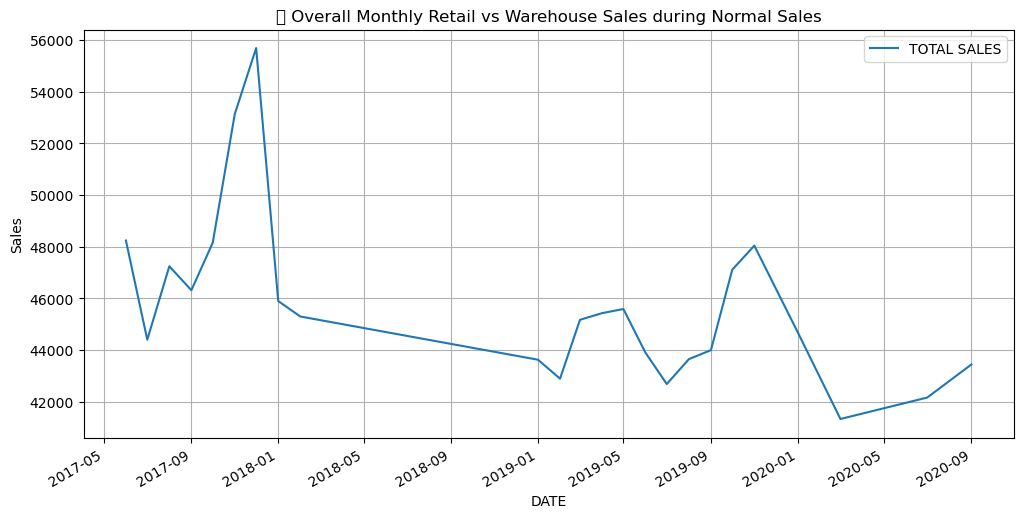

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


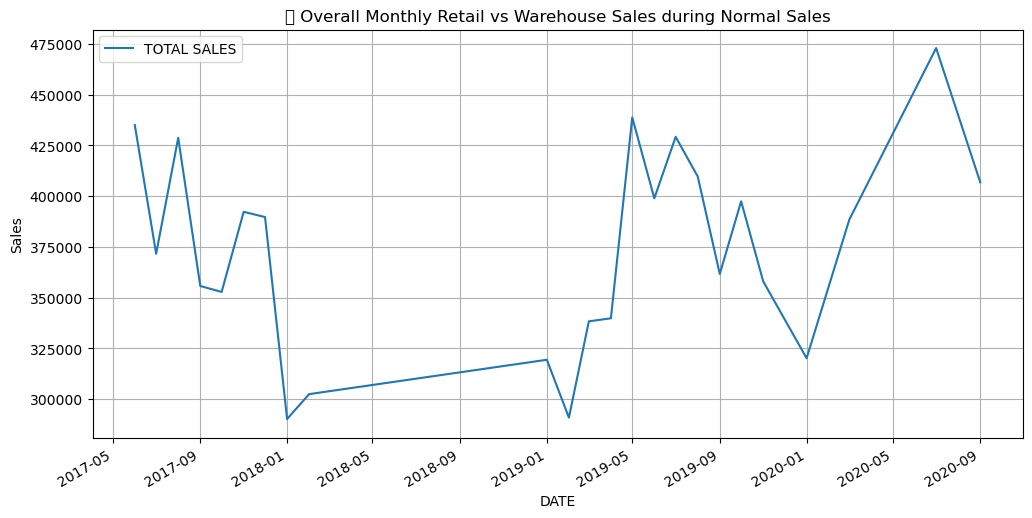

In [33]:
# Plot
Sale_Norm = Normal_sales_data.groupby('DATE')[['TOTAL SALES']].sum().reset_index()
Sale_Norm.plot(x='DATE', y=['TOTAL SALES'], figsize=(12,6))
plt.title('📊 Overall Monthly Retail vs Warehouse Sales during Normal Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Plot
Sale_Norm = Promo_data.groupby('DATE')[['TOTAL SALES']].sum().reset_index()
Sale_Norm.plot(x='DATE', y=['TOTAL SALES'], figsize=(12,6))
plt.title('📊 Overall Monthly Retail vs Warehouse Sales during Normal Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [34]:
Normal_sales_data.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES
count,262120.000000,262120.000000,262120.000000,262120.000000,262120.000000,262120.000000
mean,2018.427632,6.419041,1.721043,1.706855,2.467875,4.188918
std,1.082071,3.469958,3.586637,4.748767,3.795093,5.254921
min,2017.000000,1.000000,-1.000000,-38.490000,-11.170000,0.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,2019.000000,7.000000,0.160000,0.000000,1.000000,2.000000
75%,2019.000000,9.000000,1.520000,1.000000,3.000000,5.250000
max,2020.000000,12.000000,24.850000,348.000000,24.830000,24.870000


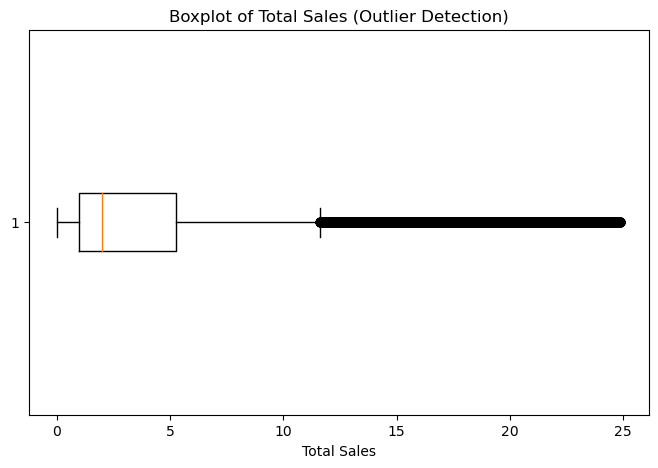

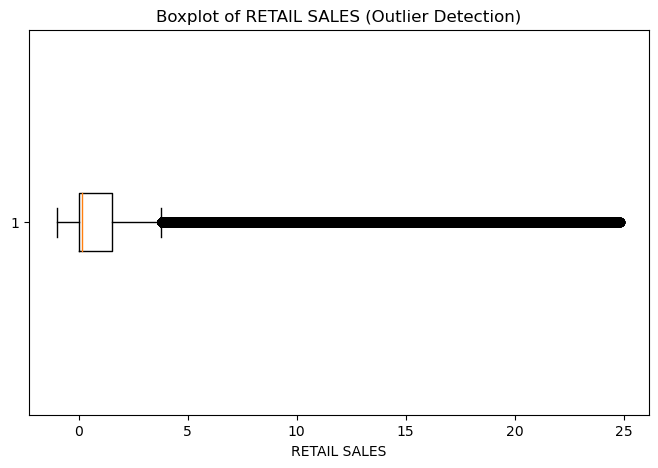

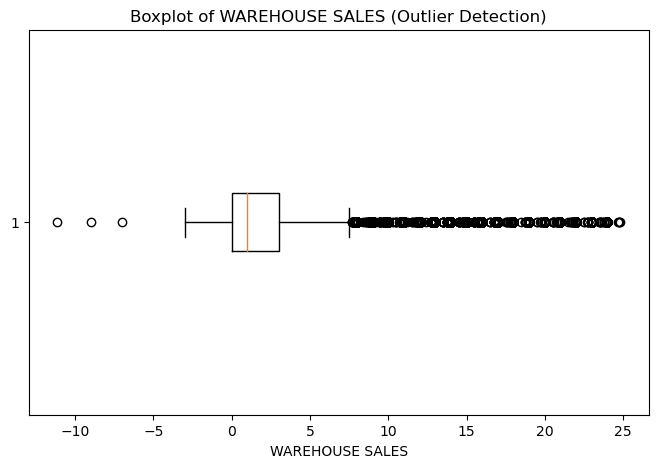

In [35]:
# Total Sales

plt.figure(figsize=(8, 5))
plt.boxplot(Normal_sales_data['TOTAL SALES'], vert=False)
plt.title('Boxplot of Total Sales (Outlier Detection)')
plt.xlabel('Total Sales')
plt.show()


plt.figure(figsize=(8, 5))
plt.boxplot(Normal_sales_data['RETAIL SALES'], vert=False)
plt.title('Boxplot of RETAIL SALES (Outlier Detection)')
plt.xlabel('RETAIL SALES')
plt.show()



plt.figure(figsize=(8, 5))
plt.boxplot(Normal_sales_data['WAREHOUSE SALES'], vert=False)
plt.title('Boxplot of WAREHOUSE SALES (Outlier Detection)')
plt.xlabel('WAREHOUSE SALES')
plt.show()


# Sales Analysis

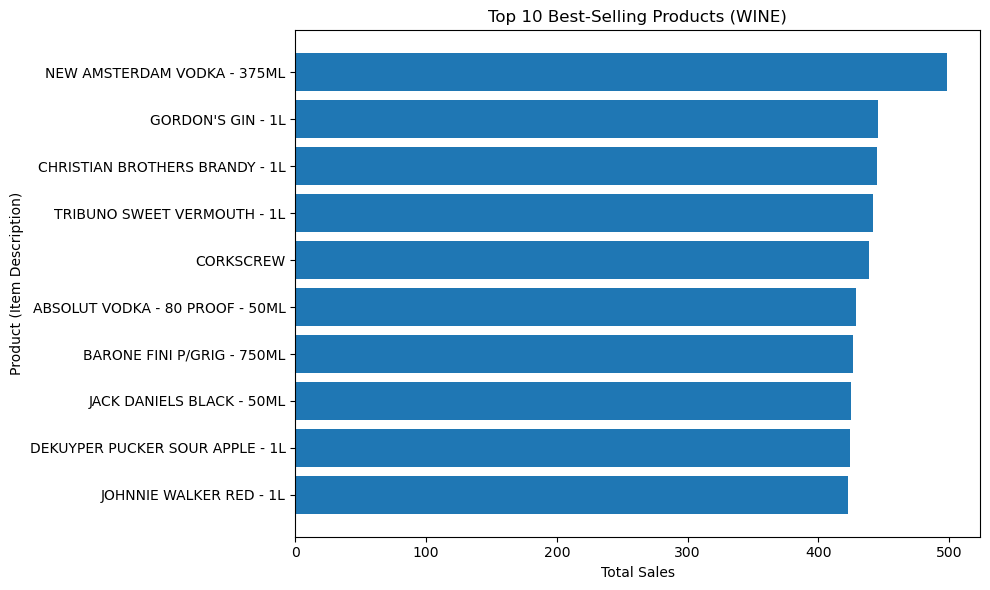

In [36]:


# Specify the item type you want to filter by
item_type_filter = 'WINE'  # Change this to 'BEER' or any other item type you have

# Filter data by selected item type
filtered_data = Normal_sales_data[Normal_sales_data['ITEM TYPE'] == item_type_filter]

# Sum total sales by product description and sort
top_products = Normal_sales_data.groupby('ITEM DESCRIPTION')['TOTAL SALES'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 best-selling products for the selected item type
plt.figure(figsize=(10, 6))
plt.barh(top_products.index[::-1], top_products.values[::-1])
plt.xlabel('Total Sales')
plt.ylabel('Product (Item Description)')
plt.title(f'Top 10 Best-Selling Products ({item_type_filter})')
plt.tight_layout()
plt.show()


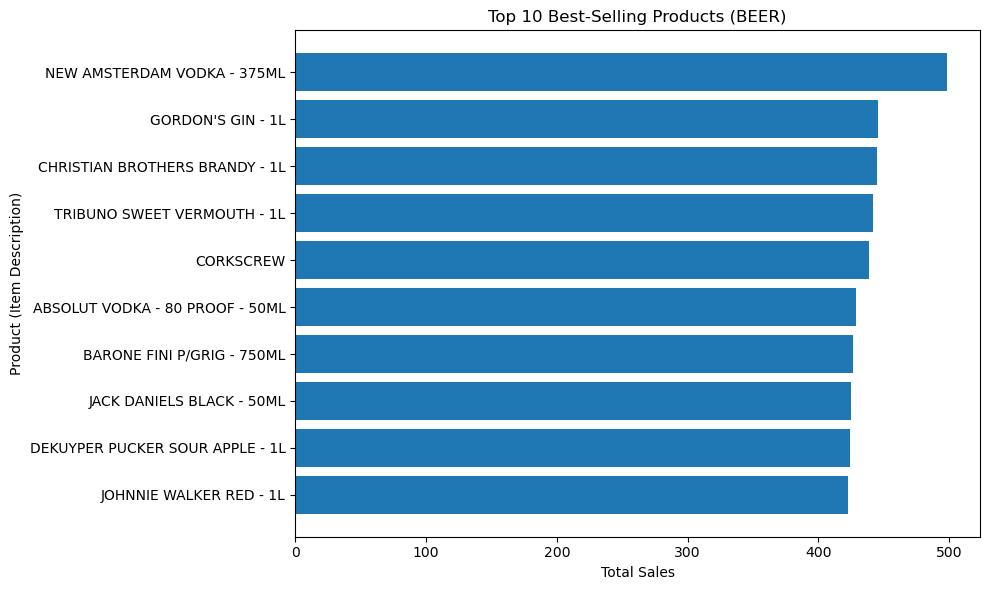

In [37]:


# Specify the item type you want to filter by
item_type_filter = 'BEER'  # Change this to 'BEER' or any other item type you have

# Filter data by selected item type
filtered_data = Normal_sales_data[Normal_sales_data['ITEM TYPE'] == item_type_filter]

# Sum total sales by product description and sort
top_products = Normal_sales_data.groupby('ITEM DESCRIPTION')['TOTAL SALES'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 best-selling products for the selected item type
plt.figure(figsize=(10, 6))
plt.barh(top_products.index[::-1], top_products.values[::-1])
plt.xlabel('Total Sales')
plt.ylabel('Product (Item Description)')
plt.title(f'Top 10 Best-Selling Products ({item_type_filter})')
plt.tight_layout()
plt.show()


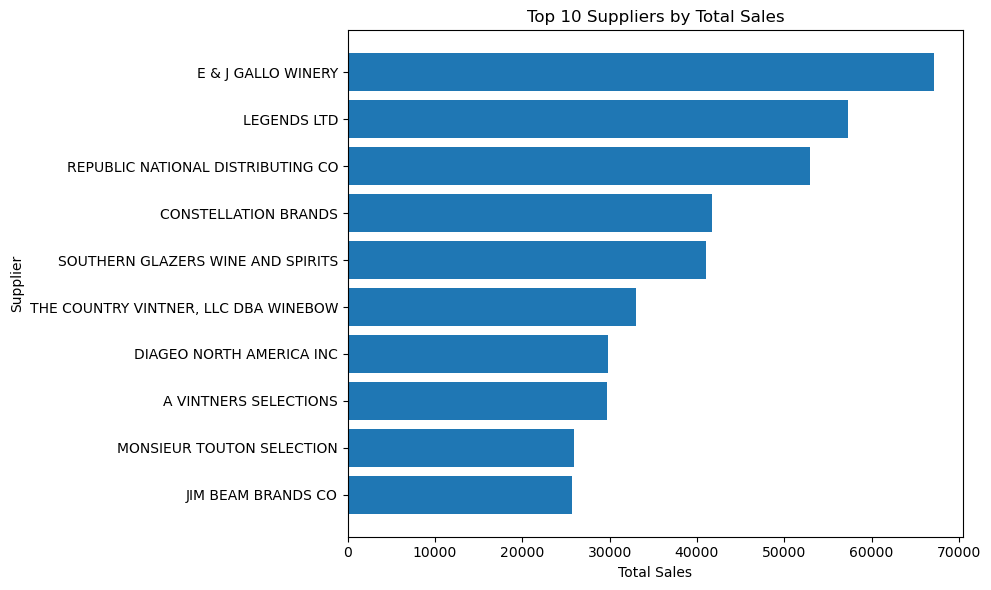

In [38]:
# Group by supplier and sum total sales
supplier_sales = Normal_sales_data.groupby('SUPPLIER')['TOTAL SALES'].sum().sort_values(ascending=False).head(10)

# Plotting the top 10 suppliers by total sales
plt.figure(figsize=(10, 6))
plt.barh(supplier_sales.index[::-1], supplier_sales.values[::-1])
plt.xlabel('Total Sales')
plt.ylabel('Supplier')
plt.title('Top 10 Suppliers by Total Sales')
plt.tight_layout()
plt.show()

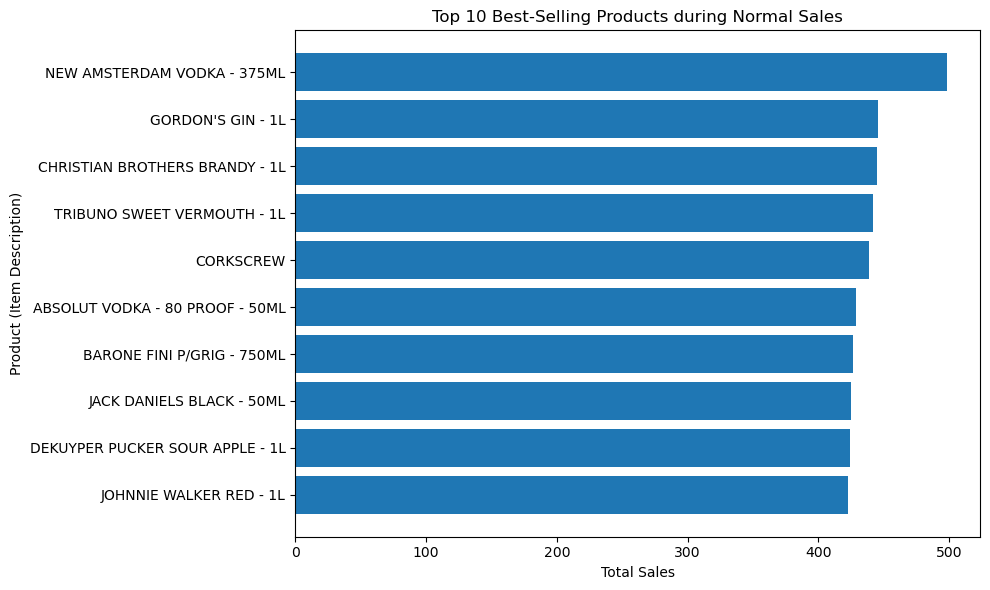

In [39]:
# Group by item description and get top 10 products by total sales
top_products = Normal_sales_data.groupby('ITEM DESCRIPTION')['TOTAL SALES'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_products.index[::-1], top_products.values[::-1])  # Reversed for descending order top-down
plt.xlabel('Total Sales')
plt.ylabel('Product (Item Description)')
plt.title('Top 10 Best-Selling Products during Normal Sales')
plt.tight_layout()
plt.show()

In [40]:
# Check if promo products are all present in normal sales
all_present = set(promo_products).issubset(set(normal_products))

if all_present:
    print("✅ All promo products are also available in normal sales.")
else:
    print("❌ Some promo products are NOT available in normal sales.")


NameError: name 'promo_products' is not defined

In [ ]:
# Products only available in normal sales (never on promo)
exclusive_normal_products = set(normal_products) - set(promo_products)

print(f"Number of normal-only products: {len(exclusive_normal_products)}")
print("Promo-only products:")
for product in exclusive_normal_products:
    print(product)



In [ ]:
Normal_sales_data

In [ ]:
Normal_sales_data['DATE'] = pd.to_datetime(Normal_sales_data['DATE'])
Promo_data['DATE'] = pd.to_datetime(Promo_data['DATE'])

# Group by month and sum total sales
normal_monthly = Normal_sales_data.groupby(Normal_sales_data['DATE'].dt.to_period('M'))['TOTAL SALES'].sum().reset_index()
promo_monthly = Promo_data.groupby(Promo_data['DATE'].dt.to_period('M'))['TOTAL SALES'].sum().reset_index()

# Convert period to timestamp for plotting
normal_monthly['DATE'] = normal_monthly['DATE'].dt.to_timestamp()
promo_monthly['DATE'] = promo_monthly['DATE'].dt.to_timestamp()

# Sort by DATE (optional after groupby but good practice)
normal_monthly = normal_monthly.sort_values(by='DATE')
promo_monthly = promo_monthly.sort_values(by='DATE')

In [ ]:
Normal_sales_data

In [ ]:
# Plot of sales during Normal and Prom


plt.figure(figsize=(14, 6))
plt.plot(normal_monthly['DATE'], normal_monthly['TOTAL SALES'], label='Normal Sales')
plt.plot(promo_monthly['DATE'], promo_monthly['TOTAL SALES'], label='Promo Sales')
plt.title('Monthly Total Sales: Normal vs. Promo')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Filter both datasets for common items
common_normal_sales = Normal_sales_data[Normal_sales_data['ITEM CODE'].isin(common_items)]
common_promo_sales = Promo_data[Promo_data['ITEM CODE'].isin(common_items)]

# Sum total sales for each common item
normal_totals = common_normal_sales.groupby(['ITEM CODE', 'ITEM DESCRIPTION'])['TOTAL SALES'].sum().reset_index()
promo_totals = common_promo_sales.groupby(['ITEM CODE', 'ITEM DESCRIPTION'])['TOTAL SALES'].sum().reset_index()

# Merge both totals
sales_comparison = pd.merge(normal_totals, promo_totals, on='ITEM CODE', suffixes=('_Normal', '_Promo'))

# Drop duplicate descriptions (from merge) and keep only ITEM CODE and total sales
sales_comparison = sales_comparison[['ITEM CODE', 'ITEM DESCRIPTION_Normal', 'TOTAL SALES_Normal', 'TOTAL SALES_Promo']]

# Rename for clarity
sales_comparison.columns = ['ITEM CODE', 'ITEM DESCRIPTION', 'Normal Sales', 'Promo Sales']

# Calculate total combined sales
sales_comparison['Total Combined Sales'] = sales_comparison['Normal Sales'] + sales_comparison['Promo Sales']

# Sort by total combined sales and display top 10
top_items = sales_comparison.sort_values(by='Total Combined Sales', ascending=False).head(10)

print(top_items)

In [ ]:
# Plotting grouped bar chart
labels = top_items['ITEM DESCRIPTION']
x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(14, 7))
bar1 = ax.bar(x - width/2, top_items['Normal Sales'], width, label='Normal Sales')
bar2 = ax.bar(x + width/2, top_items['Promo Sales'], width, label='Promo Sales')

# Labels and formatting
ax.set_xlabel('Item Description')
ax.set_ylabel('Total Sales')
ax.set_title('Top 10  Items in Normal vs. Promo Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.grid(True, axis='y')
ax.set_yscale('log')
plt.show()

In [ ]:
# Ensure consistent supplier format
Normal_sales_data['SUPPLIER'] = Normal_sales_data['SUPPLIER'].astype(str)
Promo_data['SUPPLIER'] = Promo_data['SUPPLIER'].astype(str)

# Group by supplier and sum total sales
normal_supplier_sales = Normal_sales_data.groupby('SUPPLIER')['TOTAL SALES'].sum().reset_index()
promo_supplier_sales = Promo_data.groupby('SUPPLIER')['TOTAL SALES'].sum().reset_index()

# Merge both datasets on supplier
supplier_comparison = pd.merge(
    normal_supplier_sales,
    promo_supplier_sales,
    on='SUPPLIER',
    how='inner',
    suffixes=('_Normal', '_Promo')
)

# Calculate promo lift and percentage change
supplier_comparison['Promo_Lift'] = supplier_comparison['TOTAL SALES_Promo'] - supplier_comparison['TOTAL SALES_Normal']
supplier_comparison['Percent_Lift'] = (supplier_comparison['Promo_Lift'] / supplier_comparison['TOTAL SALES_Normal']) * 100

# Sort suppliers by promo lift
top_suppliers = supplier_comparison.sort_values(by='Promo_Lift', ascending=False)

# Display top 10 suppliers that benefited most from promotion
print(top_suppliers.head(10))

In [ ]:
Normal_sales_data

In [ ]:
# Group by supplier
normal = Normal_sales_data.groupby('SUPPLIER')['TOTAL SALES'].sum().reset_index()
promo = Promo_data.groupby('SUPPLIER')['TOTAL SALES'].sum().reset_index()
merged = pd.merge(normal, promo, on='SUPPLIER', how='inner', suffixes=('_Normal', '_Promo'))

# Total and % contribution
merged['Total'] = merged['TOTAL SALES_Normal'] + merged['TOTAL SALES_Promo']
top_suppliers = merged.sort_values(by='Total', ascending=False).head(10)
top_suppliers['Normal %'] = top_suppliers['TOTAL SALES_Normal'] / top_suppliers['Total'] * 100
top_suppliers['Promo %'] = top_suppliers['TOTAL SALES_Promo'] / top_suppliers['Total'] * 100

# Plot stacked bar
labels = top_suppliers['SUPPLIER']
x = range(len(labels))

plt.figure(figsize=(14, 7))
plt.bar(x, top_suppliers['Normal %'], label='Normal %')
plt.bar(x, top_suppliers['Promo %'], bottom=top_suppliers['Normal %'], label='Promo %')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('Sales Contribution (%)')
plt.title('Top 10 Suppliers: % Contribution by Sales Type')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [ ]:
Promo_data

In [ ]:
# Group by item type in promo dataset
promo_type = Promo_data.groupby('ITEM TYPE')['TOTAL SALES'].sum().reset_index()
promo_type = promo_type.sort_values(by='TOTAL SALES', ascending=False)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(promo_type['TOTAL SALES'], labels=promo_type['ITEM TYPE'], autopct='%1.1f%%', startangle=140)
plt.title('Promo Sales Distribution by Item Type')
plt.tight_layout()
plt.show()


In [ ]:
# Group by item type in promo dataset
promo_type = Normal_sales_data.groupby('ITEM TYPE')['TOTAL SALES'].sum().reset_index()
promo_type = promo_type.sort_values(by='TOTAL SALES', ascending=False)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(promo_type['TOTAL SALES'], labels=promo_type['ITEM TYPE'], autopct='%1.1f%%', startangle=140)
plt.title('Normal Sales Distribution by Item Type')
plt.tight_layout()
plt.show()

In [ ]:
# Convert dates
Promo_data['DATE'] = pd.to_datetime(Promo_data['DATE'])

# Group by month
monthly = Promo_data.groupby(Promo_data['DATE'].dt.to_period('M'))['TOTAL SALES'].sum().reset_index()
monthly['DATE'] = monthly['DATE'].dt.to_timestamp()

# Calculate 3-month moving average
monthly['MA_3'] = monthly['TOTAL SALES'].rolling(window=3, center=True).mean()

# Plot line with shaded area
plt.figure(figsize=(14, 6))
plt.plot(monthly['DATE'], monthly['TOTAL SALES'], label='Monthly Sales', alpha=0.5)
plt.plot(monthly['DATE'], monthly['MA_3'], label='3-Month Moving Avg', color='red')
plt.fill_between(monthly['DATE'], monthly['MA_3'], alpha=0.3, color='red')
plt.title('Promo Sales with Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data[['RETAIL SALES', 'WAREHOUSE SALES', 'TOTAL SALES']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sales Features')
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Assuming you've clearly defined Promo_data (from your existing script):
normal_data = data[~data.index.isin(Promo_data.index)]

# Compare promo vs normal sales statistically
ttest_result = ttest_ind(Promo_data['TOTAL SALES'], normal_data['TOTAL SALES'], equal_var=False)
print("T-test result:", ttest_result)

# Visualization
sns.boxplot(data=[Promo_data['TOTAL SALES'], normal_data['TOTAL SALES']], palette='Set2')
plt.xticks([0, 1], ['Promo Sales', 'Normal Sales'])
plt.title('Promo vs Normal Sales Comparison')
plt.show()


In [ ]:
import seaborn as sns

sns.histplot(Normal_sales_data['TOTAL SALES'], kde=True)
plt.title('Distribution of Total Sales(Normal)')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

sns.histplot(Promo_data['TOTAL SALES'], kde=True)
plt.title('Distribution of Total Sales(Promo)')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Normal_sales_data, x='DATE', y='TOTAL SALES', hue='ITEM TYPE', estimator='sum', ci=None)
plt.title('Sales Trends by Item Type In Normal Sales')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.legend(title='Item Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=Promo_data, x='DATE', y='TOTAL SALES', hue='ITEM TYPE', estimator='sum', ci=None)
plt.title('Sales Trends by Item Type In Promo Sales')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.legend(title='Item Type')
plt.show()


In [ ]:
supplier_sales = data.groupby('SUPPLIER')['TOTAL SALES'].sum().sort_values(ascending=False).head(10)

supplier_sales.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Suppliers by Sales')
plt.xlabel('Supplier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
sales_volatility = data.groupby('ITEM DESCRIPTION')['TOTAL SALES'].std().sort_values(ascending=False)
sales_volatility.head(10).plot(kind='bar', title='Top 10 Products by Sales Volatility')
plt.ylabel('Standard Deviation of Sales')
plt.show()


In [ ]:
sales_velocity = data.groupby('ITEM DESCRIPTION')['TOTAL SALES'].mean().sort_values(ascending=False)
sales_velocity.head(10).plot(kind='bar', title='Top 10 Products by Sales Velocity (Avg Sales)')
plt.ylabel('Average Monthly Sales')
plt.show()


In [ ]:
data['SALES_LAG_1'] = data['TOTAL SALES'].shift(1)
print(data[['TOTAL SALES', 'SALES_LAG_1']].corr())


In [ ]:
promo_effect = Normal_sales_data.groupby('MONTH')['TOTAL SALES'].mean()
promo_effect.plot(kind='bar', title='Average Monthly Sales On Normal Sales')
plt.ylabel('Average Sales')
plt.show()


In [ ]:
promo_effect = Promo_data.groupby('MONTH')['TOTAL SALES'].mean()
promo_effect.plot(kind='bar', title='Average Monthly Sales During Promo')
plt.ylabel('Average Sales')
plt.show()


In [ ]:
pro

In [ ]:
# Total sales per supplier (normal sales)
supplier_sales = normal_data.groupby("SUPPLIER")["TOTAL SALES"].sum().sort_values()

# Top 10 suppliers
top_suppliers = supplier_sales.sort_values(ascending=False).head(10)

# Bottom 10 suppliers
bottom_suppliers = supplier_sales.head(10)

# --- PRODUCT PERFORMANCE ---

# Total sales per product (normal sales)
product_sales = normal_data.groupby("ITEM DESCRIPTION")["TOTAL SALES"].sum().sort_values()

# Top 10 products
top_products = product_sales.sort_values(ascending=False).head(10)

# Bottom 10 products
bottom_products = product_sales.head(10)

# --- PLOTS ---

# Top suppliers
plt.figure(figsize=(10, 5))
top_suppliers.plot(kind='barh')
plt.title("Top 10 Suppliers by Total Sales During Normal Sales")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()

# Bottom suppliers
plt.figure(figsize=(10, 5))
bottom_suppliers.plot(kind='barh', color='orange')
plt.title("Bottom 10 Suppliers by Total Sales During Normal Sales")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()

# Top products
plt.figure(figsize=(10, 5))
top_products.plot(kind='barh')
plt.title("Top 10 Products by Total Sales During Normal Sales")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()


In [ ]:
# Total sales per supplier (normal sales)
supplier_sales = Promo_data.groupby("SUPPLIER")["TOTAL SALES"].sum().sort_values()

# Top 10 suppliers
top_suppliers = supplier_sales.sort_values(ascending=False).head(10)

# Bottom 10 suppliers
bottom_suppliers = supplier_sales.head(10)

# --- PRODUCT PERFORMANCE ---

# Total sales per product (normal sales)
product_sales = Promo_data.groupby("ITEM DESCRIPTION")["TOTAL SALES"].sum().sort_values()

# Top 10 products
top_products = product_sales.sort_values(ascending=False).head(10)

# Bottom 10 products
bottom_products = product_sales.head(10)

# --- PLOTS ---

# Top suppliers
plt.figure(figsize=(10, 5))
top_suppliers.plot(kind='barh')
plt.title("Top 10 Suppliers by Total Sales During Promo Sales")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()

# Bottom suppliers
plt.figure(figsize=(10, 5))
bottom_suppliers.plot(kind='barh', color='orange')
plt.title("Bottom 10 Suppliers by Total Sales During Promo Sales")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()

# Top products
plt.figure(figsize=(10, 5))
top_products.plot(kind='barh')
plt.title("Top 10 Products by Total Sales During Promo Sales")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()


In [ ]:
# Group by date and supplier
supplier_monthly = Normal_sales_data.groupby(['SUPPLIER', 'DATE'])['TOTAL SALES'].sum().reset_index()

supplier_volatility = supplier_monthly.groupby('SUPPLIER')['TOTAL SALES'].agg(['mean', 'std']).reset_index()
supplier_volatility['SVI'] = supplier_volatility['std'] / supplier_volatility['mean']
supplier_volatility = supplier_volatility[supplier_volatility['mean'] > 0]
top_volatile_suppliers = supplier_volatility.sort_values('SVI', ascending=False).head(10)

# --- Lollipop Chart for Suppliers ---
plt.figure(figsize=(10, 6))
plt.hlines(y=top_volatile_suppliers['SUPPLIER'], xmin=0, xmax=top_volatile_suppliers['SVI'], color='skyblue')
plt.plot(top_volatile_suppliers['SVI'], top_volatile_suppliers['SUPPLIER'], "o")
plt.xlabel("Sales Volatility Index (SVI)")
plt.title("Top 10 Most Volatile Suppliers (Lollipop Chart) During Normal sales ")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# -------------------------
# 📦 PRODUCT SALES VOLATILITY
# -------------------------
product_monthly = Normal_sales_data.groupby(['ITEM DESCRIPTION', 'DATE'])['TOTAL SALES'].sum().reset_index()
product_volatility = product_monthly.groupby('ITEM DESCRIPTION')['TOTAL SALES'].agg(['mean', 'std']).reset_index()
product_volatility['SVI'] = product_volatility['std'] / product_volatility['mean']
product_volatility = product_volatility[product_volatility['mean'] > 0]
top_volatile_products = product_volatility.sort_values('SVI', ascending=False).head(10)

# --- Radar Chart for Products ---
labels = top_volatile_products['ITEM DESCRIPTION']
stats = top_volatile_products['SVI'].values
angles = np.linspace(0, 2 * np.pi, len(stats), endpoint=False).tolist()
stats = np.concatenate((stats, [stats[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.plot(angles, stats, color='crimson', linewidth=2)
ax.fill(angles, stats, color='crimson', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
plt.title("Product Sales Volatility Radar Chart During Normal sales", y=1.1)
plt.tight_layout()
plt.show()

In [ ]:
# Group by date and supplier
supplier_monthly = Promo_data.groupby(['SUPPLIER', 'DATE'])['TOTAL SALES'].sum().reset_index()

supplier_volatility = supplier_monthly.groupby('SUPPLIER')['TOTAL SALES'].agg(['mean', 'std']).reset_index()
supplier_volatility['SVI'] = supplier_volatility['std'] / supplier_volatility['mean']
supplier_volatility = supplier_volatility[supplier_volatility['mean'] > 0]
top_volatile_suppliers = supplier_volatility.sort_values('SVI', ascending=False).head(10)

# --- Lollipop Chart for Suppliers ---
plt.figure(figsize=(10, 6))
plt.hlines(y=top_volatile_suppliers['SUPPLIER'], xmin=0, xmax=top_volatile_suppliers['SVI'], color='skyblue')
plt.plot(top_volatile_suppliers['SVI'], top_volatile_suppliers['SUPPLIER'], "o")
plt.xlabel("Sales Volatility Index (SVI)")
plt.title("Top 10 Most Volatile Suppliers (Lollipop Chart) During Promo sales")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# -------------------------
# 📦 PRODUCT SALES VOLATILITY
# -------------------------
product_monthly = Promo_data.groupby(['ITEM DESCRIPTION', 'DATE'])['TOTAL SALES'].sum().reset_index()
product_volatility = product_monthly.groupby('ITEM DESCRIPTION')['TOTAL SALES'].agg(['mean', 'std']).reset_index()
product_volatility['SVI'] = product_volatility['std'] / product_volatility['mean']
product_volatility = product_volatility[product_volatility['mean'] > 0]
top_volatile_products = product_volatility.sort_values('SVI', ascending=False).head(10)

# --- Radar Chart for Products ---
labels = top_volatile_products['ITEM DESCRIPTION']
stats = top_volatile_products['SVI'].values
angles = np.linspace(0, 2 * np.pi, len(stats), endpoint=False).tolist()
stats = np.concatenate((stats, [stats[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, stats, color='crimson', linewidth=2)
ax.fill(angles, stats, color='crimson', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
plt.title("Product Sales Volatility Radar Chart During Promo sales", y=1.1)
plt.tight_layout()
plt.show()